# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised (Clustering)
##### **Contribution**    - Individual



# **About Me :**

*Name* : NAVEEN GUPTA

*LinkedIn* : https://www.linkedin.com/in/naveen-gupta-a446a9352?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app

*Git Hub* : https://github.com/ng49-rgb

*Medium* : https://medium.com/@ng251370


# **Project Summary -**

Write the summary here within 500-600 words.


Project Summary

The primary objective of this machine learning project was to segment the customer base of an online retail business using unsupervised learning techniques. Effective customer segmentation enables the business to better understand unique customer characteristics and behaviors, empowering targeted marketing strategies that improve satisfaction, retention, and profitability.


After robust data cleaning and exploratory data analysis (EDA), we engineered informative features such as purchase frequency, total spend, and behavioral consistency at the customer level. These features enabled us to identify key customer segments and their distinct engagement patterns. The analysis revealed important customer groups, including consistent high-value buyers, frequent regular shoppers, and less engaged or opportunistic customers.


Multiple clustering algorithms were employed—including KMeans and Agglomerative (Hierarchical) Clustering—to uncover natural segments within the customer data. Optimal cluster numbers were determined using methods such as the Elbow Method, Silhouette Scores, and Dendrogram visualization. Clustering results were visualized in reduced dimensions using PCA, revealing clear and well-separated customer groups.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/ng49-rgb/machine-learning

# **Problem Statement**

 In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/Copy of Online Retail.xlsx - Online Retail.csv', encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The shape of the dataset is {data.shape}')

The shape of the dataset is (541909, 8)


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'There are {data.duplicated().sum()} duplicate values in the dataset')

There are 5268 duplicate values in the dataset


In [ ]:
duplicate_columns = [col for col in data.columns if data[col].duplicated().any()]
print("Columns with duplicate values:", duplicate_columns)

Columns with duplicate values: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

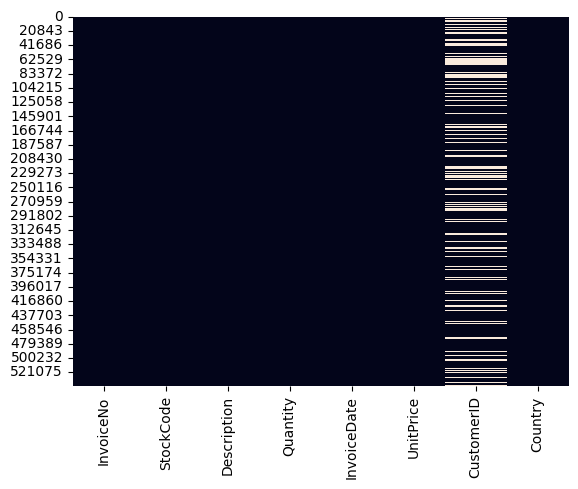

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

We need to deal with these null values later.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

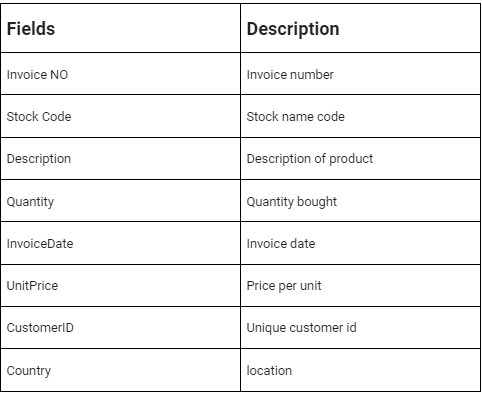

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = data.copy()

In [ ]:
# Remove rows with negative Quantity
df = df[df['Quantity'] > 0]

# Remove rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

# Remove rows with null CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove rows with null Description
df.dropna(subset=['Description'], inplace=True)

print("Dataset after cleaning:")
display(df.head())
print(f'\nShape of the dataset after cleaning: {df.shape}')
print(f'\nMissing values after cleaning:\n{df.isnull().sum()}')

Dataset after cleaning:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom



Shape of the dataset after cleaning: (397884, 8)

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f'Number of duplicate rows after removal: {df.duplicated().sum()}')

Number of duplicate rows after removal: 0


In [ ]:
df.nunique().sort_values()

,0
Country,37
Quantity,301
UnitPrice,440
StockCode,3665
Description,3877
CustomerID,4338
InvoiceDate,17282
InvoiceNo,18532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Convert 'CustomerID' to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# Display the data types after conversion
print("Data types after converting 'CustomerID':")
display(df.info())

Data types after converting 'CustomerID':
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


None

### What all manipulations have you done and insights you found?

Answer Here.

However, in the specific case of customer clustering and the CustomerID column, filling the missing values with a space or any other placeholder wouldn't be appropriate or beneficial.

Here's why:

Clustering requires meaningful identifiers: Clustering algorithms group data points based on their similarities. CustomerID is a unique identifier that distinguishes one customer from another. If you fill missing CustomerID values with a space or a single placeholder, you would essentially be treating all those rows as belonging to the same customer, which is incorrect and would heavily distort your clustering results. You wouldn't be able to differentiate between the customers with missing IDs.
No meaningful way to impute: Unlike some other columns where you might impute missing values based on averages, modes, or other data points, there's no logical or data-driven way to accurately guess or create a meaningful CustomerID for a missing entry. Each customer ID is unique and assigned at the time of a transaction.
Impact on clustering: The goal of customer clustering is to segment customers based on their purchasing behavior. Transactions without a CustomerID cannot be attributed to a specific customer, making them unusable for this type of analysis. Including them with a placeholder would only introduce noise and inaccurate groupings.
While dropping data should be avoided when possible, in this instance, the missing CustomerID values represent transactions from unidentified customers. For the purpose of customer clustering, these transactions don't provide information about specific customer behavior and therefore cannot be included in the analysis. Dropping them ensures that your clustering is performed only on data that is relevant to identifying distinct customer segments.

Think of it this way: if you were trying to group students based on their grades, you couldn't include exam papers without a student's name on them, even if there were many such papers. They simply don't contribute to understanding individual student performance.

So, while dropping data isn't ideal in general, it's the most appropriate and necessary step for the CustomerID column in this customer clustering project.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -  Plotting to check UnitPrice

<Axes: xlabel='UnitPrice'>

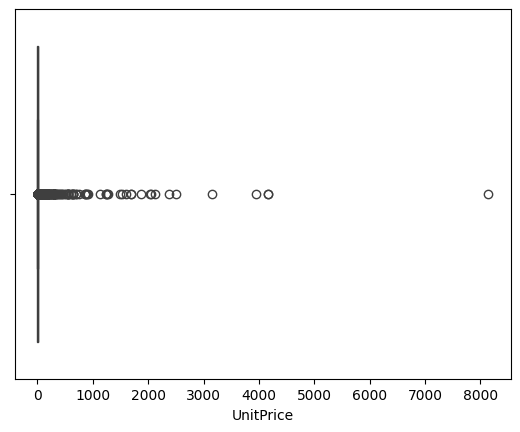

In [ ]:
# Chart -  visualization code
sns.boxplot(x=df['UnitPrice'])

##### 1. Why did you pick the specific chart?

Answer Here.

To find the range and see outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the range is under 2000 ,but also has a UnitPrice more than 8000(as outlier)

#### Chart -  UnitPrice And Country

Text(0, 0.5, 'UnitPrice')

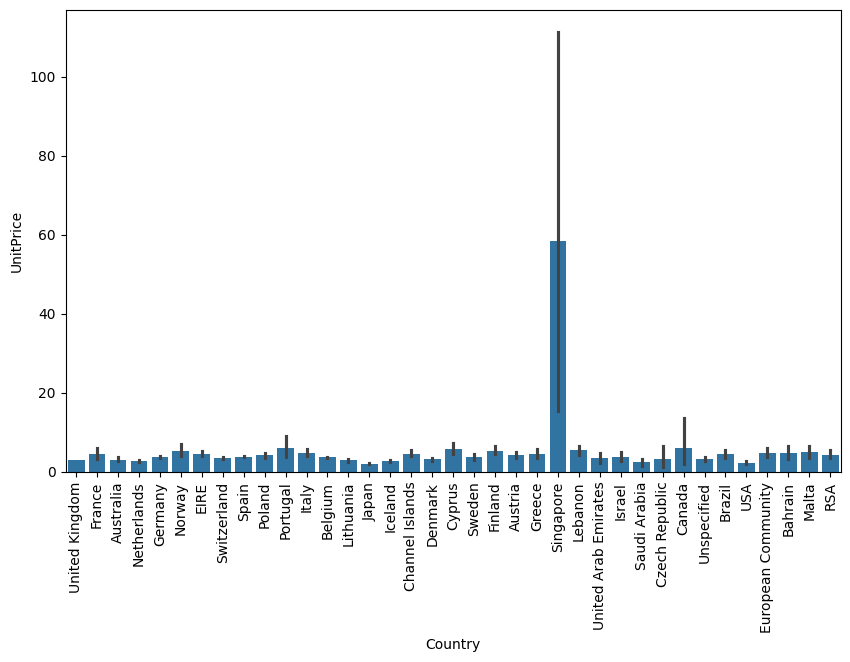

In [ ]:
# Chart -  visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='UnitPrice', data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('UnitPrice')

##### 1. Why did you pick the specific chart?

Answer Here.

To find which country has the most highest UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Singapore is found to be the country with Highest unit price.

#### Chart -  Quantity Disrtibution

<Axes: xlabel='Quantity'>

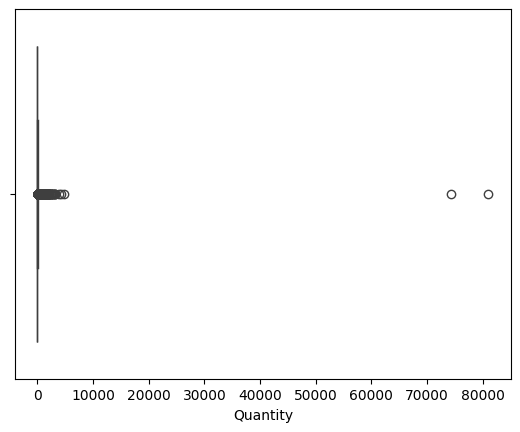

In [ ]:
sns.boxplot(x=df['Quantity'])

In [ ]:
# Chart -  visualization code
import plotly.express as px
fig = px.histogram(df, x="Quantity", nbins=20, title="Distribution of Quantity Sold")
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Count",
    bargap=0.1
)
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To find the pattern of Quantity Sold out.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Almost all of the Quantity lies b/w 0-4900.

#### Chart -  Quantity v/s Country

Text(0, 0.5, 'Quantity')

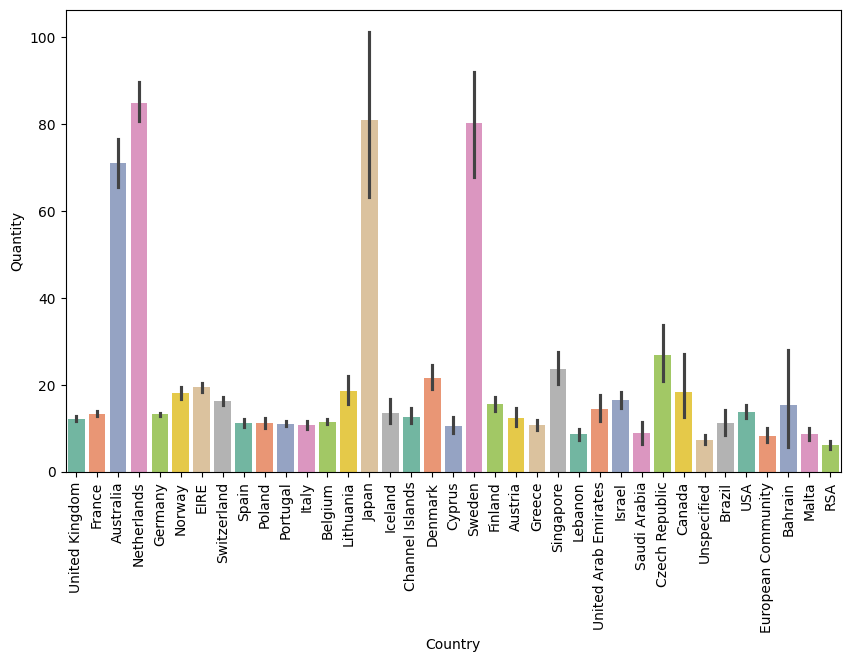

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Quantity', palette= 'Set2',data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Quantity')

##### 1. Why did you pick the specific chart?

Answer Here.

To find which country has the highest quantity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart -  Correlation Heatmap

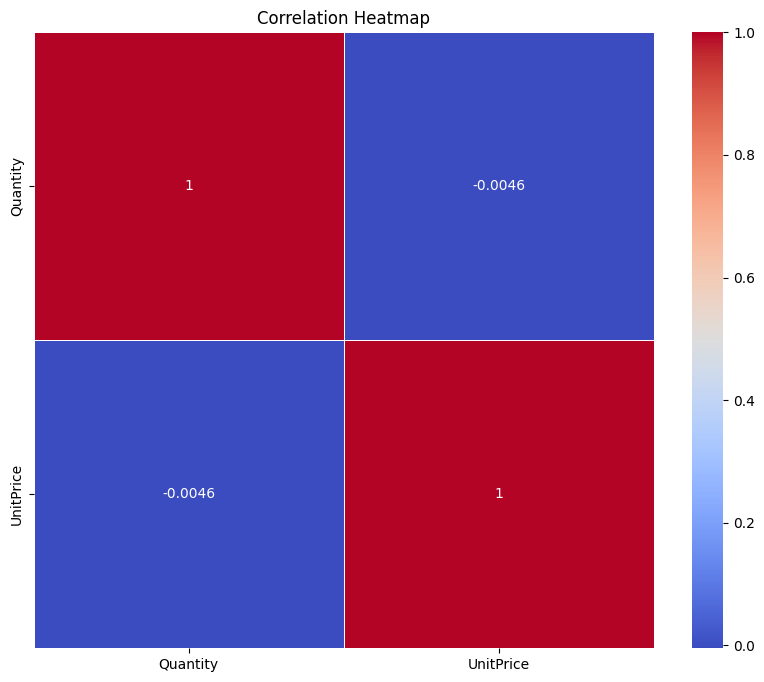

In [ ]:
# Correlation Heatmap visualization code
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To check the correlation between numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is virtually no correlation between Quantity and UnitPrice in your dataset, as shown by the near-zero correlation coefficient (-0.0046).

#### Chart - Pair Plot

In [ ]:
# # Pair Plot visualization code
# numerical_cols = ['Quantity', 'UnitPrice']
# sns.pairplot(df[numerical_cols])
# plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
To check the linearity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the data is non linear.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Calculate IQR for Quantity
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Calculate IQR for UnitPrice
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice
lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Capping the outliers instead of removing rows
df['Quantity'] = df['Quantity'].clip(lower=lower_bound_quantity, upper=upper_bound_quantity)
df['UnitPrice'] = df['UnitPrice'].clip(lower=lower_bound_unitprice, upper=upper_bound_unitprice)

# Print shape (should remain unchanged)
print(f"Shape of data after capping outliers: {df.shape}")

Shape of data after capping outliers: (392692, 8)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# # Encode your categorical columns

# # One-hot encode the 'Country' column if it will be used as a feature for clustering
# # This is needed because clustering algorithms typically work with numerical data.
# country_dummies = pd.get_dummies(df_cleaned['Country'], prefix='Country')

# # You can then decide whether to merge these dummies back into your main DataFrame
# # if you plan to use 'Country' as a feature for clustering.
# # df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# print("One-hot encoded 'Country' column (example):")
# display(country_dummies.head())

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Description'] = df['Description'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['Description'] = df['Description'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
stop = stopwords.words('english')
df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remove White spaces
df['Description'] = df['Description'].apply(lambda x: x.strip())

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
df['Description'] = df['Description'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = SnowballStemmer("english")
df['Description'] = df['Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
tfidf = TfidfVectorizer(max_features=1000) # You can adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['Description']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print("TF-IDF Vectorized Descriptions:")
display(tfidf_df.head())

TF-IDF Vectorized Descriptions:


,10,11,12,125g,15c,15cm,16,20,200,24,...,wool,woolli,word,world,wrap,wreath,write,yellow,your,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.615044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Creating a new col Amount(Monetary)
df['Amount'] = df['Quantity'] * df['UnitPrice']
a = df.groupby('CustomerID')['Amount'].sum().reset_index()
a.columns = ['CustomerID', 'Total_Amount']
print(a)

     CustomerID  Total_Amount
0       12346.0         28.08
1       12347.0       3877.44
2       12348.0        557.57
3       12349.0       1336.65
4       12350.0        301.90
...         ...           ...
4333    18280.0        174.50
4334    18281.0         61.92
4335    18282.0        150.96
4336    18283.0       2032.63
4337    18287.0       1520.23

[4338 rows x 2 columns]


In [ ]:
# For Frequency

b = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
b.columns = ['CustomerID', 'Frequency']
print(b)

     CustomerID  Frequency
0       12346.0          1
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4333    18280.0         10
4334    18281.0          7
4335    18282.0         12
4336    18283.0        721
4337    18287.0         70

[4338 rows x 2 columns]


In [ ]:
# Finding the recency

max_date = max(df['InvoiceDate'])
df['Difference'] = max_date - df['InvoiceDate']
c = df.groupby('CustomerID')['Difference'].min().reset_index()
c.columns = ['CustomerID', 'Difference']
c['Difference'] = c['Difference'].dt.days
print(c)

     CustomerID  Difference
0       12346.0         325
1       12347.0           1
2       12348.0          74
3       12349.0          18
4       12350.0         309
...         ...         ...
4333    18280.0         277
4334    18281.0         180
4335    18282.0           7
4336    18283.0           3
4337    18287.0          42

[4338 rows x 2 columns]


In [ ]:
print(df['Country'].value_counts())

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [ ]:
# #Encode your categorical columns

# # One-hot encode the 'Country' column if it will be used as a feature for clustering
# # This is needed because clustering algorithms typically work with numerical data.
# country_dummies = pd.get_dummies(df['Country'], prefix='Country')

# # You can then decide whether to merge these dummies back into your main DataFrame
# # if you plan to use 'Country' as a feature for clustering.
# # df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# print("One-hot encoded 'Country' column (example):")
# display(country_dummies.head())

#### 2. Feature Selection

In [ ]:
import pandas as pd

# Creating a new col Amount(Monetary)
df['Amount'] = df['Quantity'] * df['UnitPrice']
a = df.groupby('CustomerID')['Amount'].sum().reset_index()
a.columns = ['CustomerID', 'Total_Amount']

# For Frequency
b = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
b.columns = ['CustomerID', 'Frequency']

# Finding the recency
max_date = max(df['InvoiceDate'])
df['Difference'] = max_date - df['InvoiceDate']
c = df.groupby('CustomerID')['Difference'].min().reset_index()
c.columns = ['CustomerID', 'Difference']
c['Difference'] = c['Difference'].dt.days


# Step 1: Merge a, b, and c on 'CustomerID' to create the base dataframe with RFM features
df_final = pd.merge(a, b, on='CustomerID', how='inner')
df_final = pd.merge(df_final, c, on='CustomerID', how='inner')

# Step 2: Extract unique 'CustomerID' and 'Description' and TF-IDF vectorize
customer_description = df.groupby('CustomerID')['Description'].agg(lambda x: ' '.join(x)).reset_index()
tfidf.fit(df['Description']) # Refit the vectorizer on the cleaned description data
tfidf_matrix_customer = tfidf.transform(customer_description['Description']).toarray()
tfidf_df_customer = pd.DataFrame(tfidf_matrix_customer, columns=tfidf.get_feature_names_out())
tfidf_df_customer['CustomerID'] = customer_description['CustomerID']


# Step 3: Prepare Country data separately
# One-hot encode the 'Country' column based on the CustomerID's country.
customer_country = df[['CustomerID', 'Country']].drop_duplicates()
country_dummies = pd.get_dummies(customer_country, columns=['Country'], prefix='Country') # Add prefix for clarity

# Merge RFM, TF-IDF, and Country dummies
df_final = pd.merge(df_final, tfidf_df_customer, on='CustomerID', how='inner')
df_final = pd.merge(df_final, country_dummies, on='CustomerID', how='left') # Use left merge to keep all customers from df_final


# Drop CustomerID from the final feature matrix
X_final = df_final.drop(columns=['CustomerID'])

# Display the final feature matrix shape and head
print("Final feature matrix shape:", X_final.shape)
display(X_final.head())

Final feature matrix shape: (4346, 1040)


,Total_Amount,Frequency,Difference,10,11,12,125g,15c,15cm,16,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,28.08,1,325,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,True,False
1,3877.44,182,1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False
2,557.57,31,74,0.00000,0.0,0.246658,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False
3,1336.65,73,18,0.04015,0.0,0.059535,0.0,0.0,0.0,0.05232,...,False,False,False,False,False,False,False,False,False,False
4,301.90,17,309,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
print(df_final.shape)

(4346, 1041)


In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identify Numerical Features in X_final
num_cols_final = ['Total_Amount', 'Frequency', 'Difference']

# Scale Numerical Features within X_final
scaler = MinMaxScaler()
# Apply scaling only to the numerical columns in X_final
X_final[num_cols_final] = scaler.fit_transform(X_final[num_cols_final])

# Display the scaled X_final dataframe
print("Scaled X_final dataframe shape:", X_final.shape)
display(X_final.head())

Scaled X_final dataframe shape: (4346, 1040)


,Total_Amount,Frequency,Difference,10,11,12,125g,15c,15cm,16,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0.000214,0.000000,0.871314,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,True,False
1,0.034094,0.023583,0.002681,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False
2,0.004874,0.003909,0.198391,0.00000,0.0,0.246658,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False
3,0.011732,0.009381,0.048257,0.04015,0.0,0.059535,0.0,0.0,0.0,0.05232,...,False,False,False,False,False,False,False,False,False,False
4,0.002624,0.002085,0.828418,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# this is critical for future , so storing it before dropping
customer_ids = df['CustomerID']

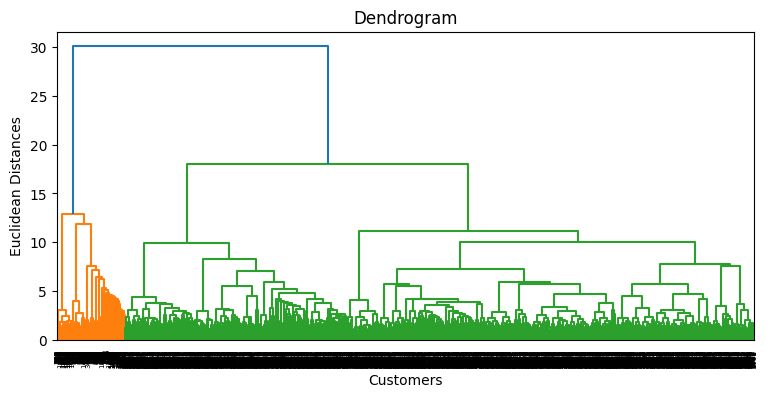

In [ ]:
plt.figure(figsize = (9, 4))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_final, method = 'ward'))#sch.dendrogram plots , sch.linkage to create links and method ward defines how the linkage will be created.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

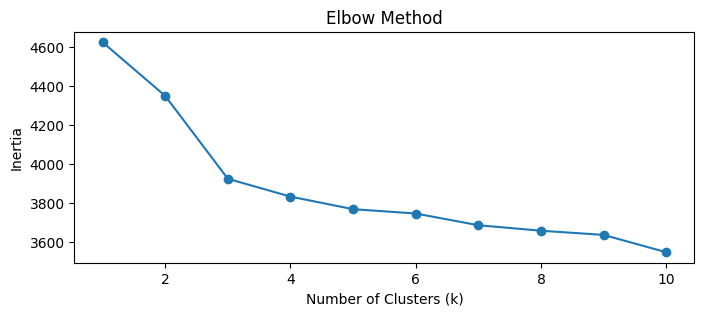

In [ ]:
#using the Elbow Method with KMeans clustering to find the optimal number of clusters k.

k_range = range(1, 11)
# preparing a list to store inertia values — which tell us how well the data is grouped for each number of clusters.
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)#train
    model.fit(X_final)#fit
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 8)

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(X_final)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_final, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.4f}")


For n_clusters=2, the silhouette score is 0.0886
For n_clusters=3, the silhouette score is 0.0955
For n_clusters=4, the silhouette score is 0.0401
For n_clusters=5, the silhouette score is 0.0401
For n_clusters=6, the silhouette score is 0.0264
For n_clusters=7, the silhouette score is 0.0283


In [ ]:
# # model creation
# kmeans = KMeans(n_clusters = 3, max_iter=50)
# kmeans.fit_predict(x_scaled)
# lbs = kmeans.labels_
# print(lbs)

In [ ]:
# df_final['Clust ID'] = lbs
# df_final.head()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')# It is a bottom up clus. method.
y_hc = hc.fit_predict(X_final)#train # y_hc is a array of label showing which data will group to which clust.

In [ ]:
y_hc

array([2, 0, 0, ..., 2, 1, 1])

In [ ]:
# Add the agglomerative clustering labels to df_final
# Ensure that the order of labels matches the order of customers in df_final
df_final = df_final.drop(columns=['CustomerID'], errors='ignore')

df_final['aglo_label'] = y_hc
df_final.head()

,Total_Amount,Frequency,Difference,10,11,12,125g,15c,15cm,16,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,aglo_label
0,28.08,1,325,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,True,False,2
1,3877.44,182,1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,0
2,557.57,31,74,0.00000,0.0,0.246658,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,0
3,1336.65,73,18,0.04015,0.0,0.059535,0.0,0.0,0.0,0.05232,...,False,False,False,False,False,False,False,False,False,0
4,301.90,17,309,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X_final)

In [ ]:
# Drop CustomerID if still present
df_final = df_final.drop(columns=['CustomerID'], errors='ignore')

# Recreate X_final from latest df_final
df_final['kmeans_label'] = y_kmeans
df_final.head()

,Total_Amount,Frequency,Difference,10,11,12,125g,15c,15cm,16,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,aglo_label,kmeans_label
0,28.08,1,325,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,True,False,2,2
1,3877.44,182,1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,0,1
2,557.57,31,74,0.00000,0.0,0.246658,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,0,1
3,1336.65,73,18,0.04015,0.0,0.059535,0.0,0.0,0.0,0.05232,...,False,False,False,False,False,False,False,False,0,1
4,301.90,17,309,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,False,False,False,False,False,False,False,False,0,1


In [ ]:
X_final = df_final.drop(columns=['kmeans_label', 'aglo_label'])

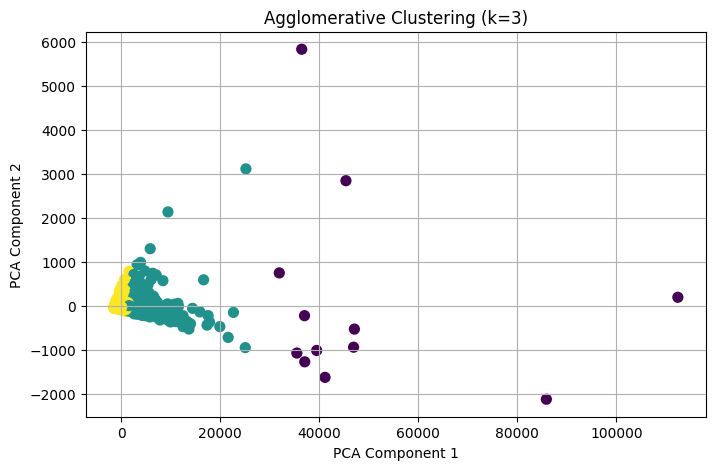

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


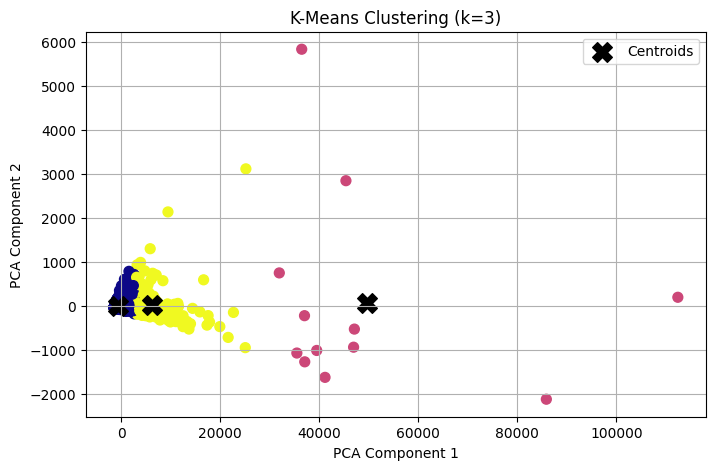

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans, cmap='plasma', s=50)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


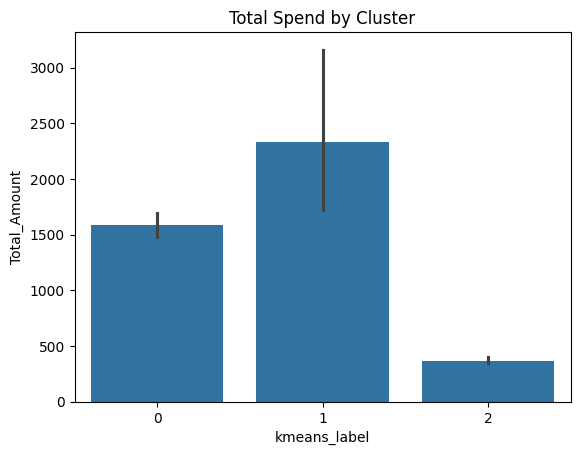

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Total spend per cluster
sns.barplot(data=df_final, x='kmeans_label', y='Total_Amount')
plt.title("Total Spend by Cluster")
plt.show()


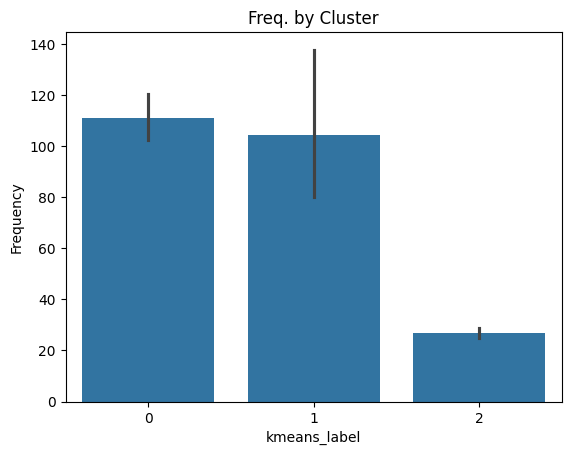

In [ ]:
sns.barplot(data=df_final, x='kmeans_label', y='Frequency')
plt.title("Freq. by Cluster")
plt.show()

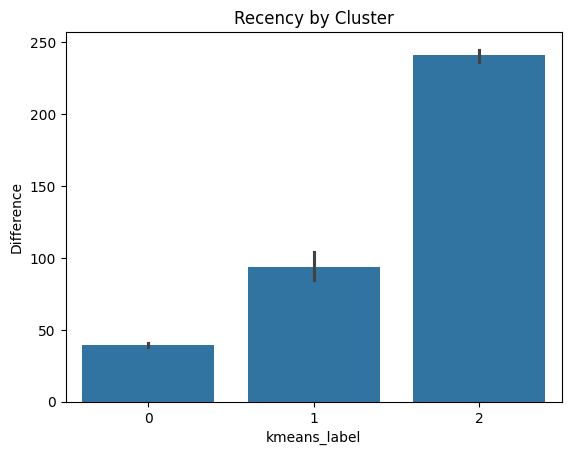

In [ ]:
sns.barplot(data=df_final, x='kmeans_label', y='Difference')
plt.title("Recency by Cluster")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(X_final, labels_kmeans))
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

KMeans Silhouette: 0.8207036804172292
Agglomerative Silhouette: 0.7782217657142965


### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Use the complete feature matrix
X = X_final  # Already preprocessed, scaled, vectorized, encoded
y = df_final['kmeans_label']  # Target cluster label

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# No need to scale again – X_final is already scaled and encoded properly

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9655172413793104

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       582
           1       1.00      0.87      0.93        85
           2       0.98      0.91      0.95       203

    accuracy                           0.97       870
   macro avg       0.98      0.93      0.95       870
weighted avg       0.97      0.97      0.96       870



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

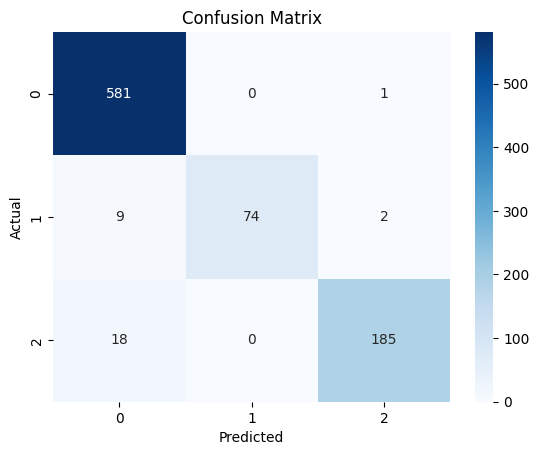

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


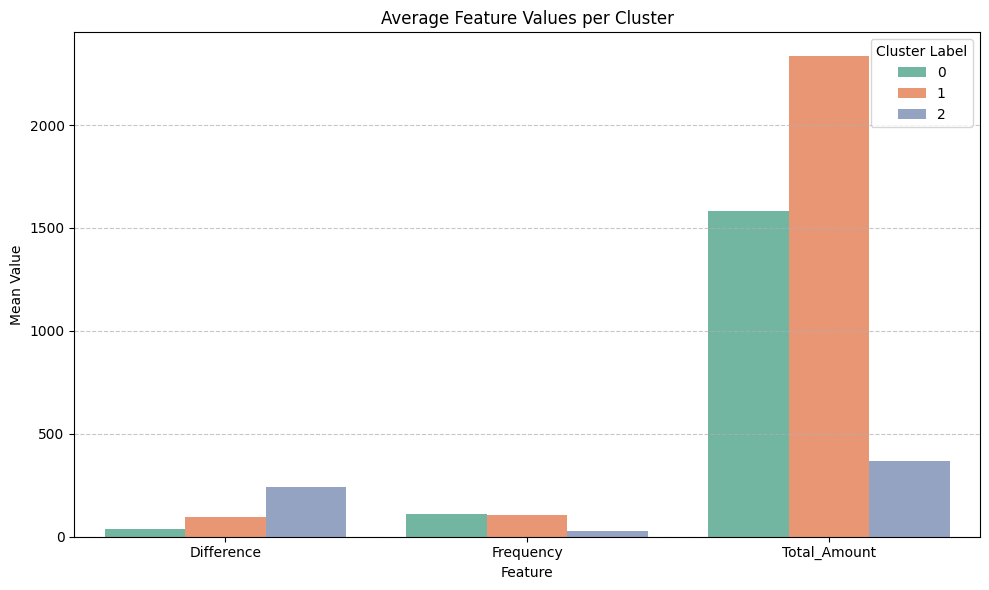

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Melt your features for visualization
melted = df_final.melt(id_vars='kmeans_label', value_vars=['Total_Amount', 'Frequency', 'Difference'],
                       var_name='Feature', value_name='Value')

# Step 2: Group by cluster and feature, then take the mean
cluster_means = melted.groupby(['kmeans_label', 'Feature'])['Value'].mean().reset_index()

# Step 3: Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Value', hue='kmeans_label', data=cluster_means, palette='Set2')
plt.title('Average Feature Values per Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.legend(title='Cluster Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ML Model - 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# X_final is your full feature set
X = X_final  # already includes scaled + TF-IDF + country dummies
y = df_final['kmeans_label']  # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9873563218390805

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       578
           1       1.00      1.00      1.00        98
           2       0.96      0.99      0.97       194

    accuracy                           0.99       870
   macro avg       0.98      0.99      0.99       870
weighted avg       0.99      0.99      0.99       870



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

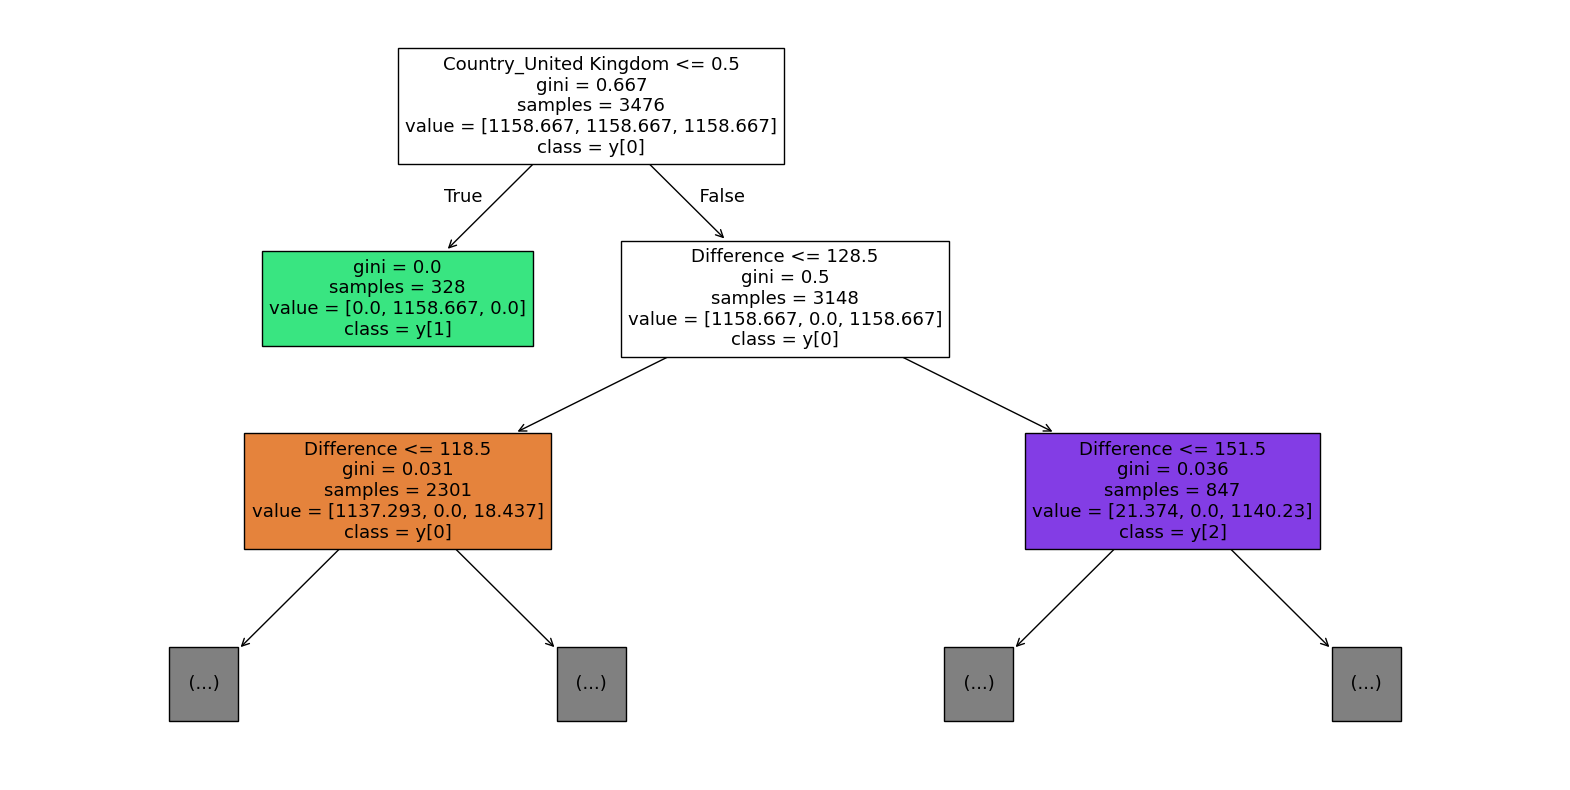

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, max_depth=2)
plt.show()


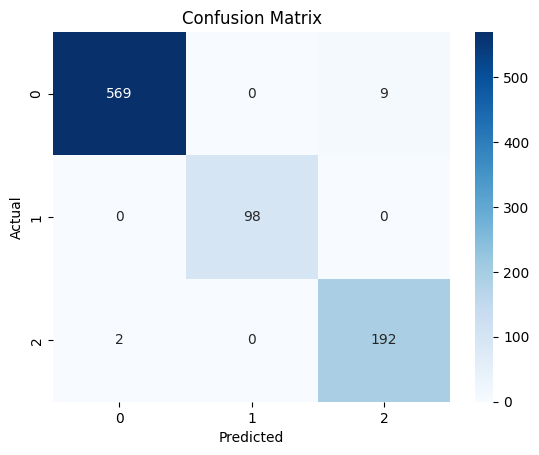

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Accuracy: 0.9873563218390805

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       578
           1       1.00      1.00      1.00        98
           2       0.96      0.99      0.97       194

    accuracy                           0.99       870
   macro avg       0.98      0.99      0.99       870
weighted avg       0.99      0.99      0.99       870



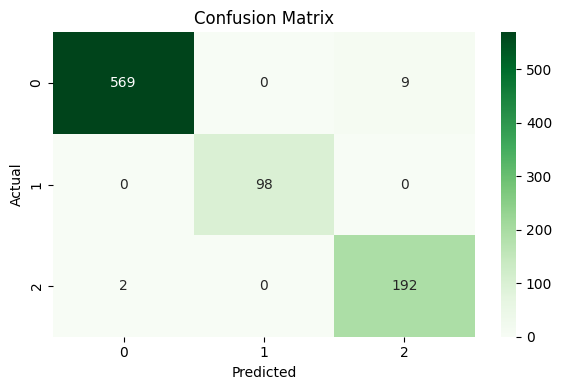

CV Accuracy Scores: [0.97816092 0.98849252 0.98043728 0.98504028 0.97698504]
Mean CV Accuracy: 0.9818232080737536


['decision_tree_model.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 1. Features and Target
X = X_final  # already includes scaled numeric + TF-IDF + country dummies
y = df_final['kmeans_label']  # cluster labels

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 4. Predictions and evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 6. Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# 7. Save the model (optional)
joblib.dump(clf, 'decision_tree_model.pkl')


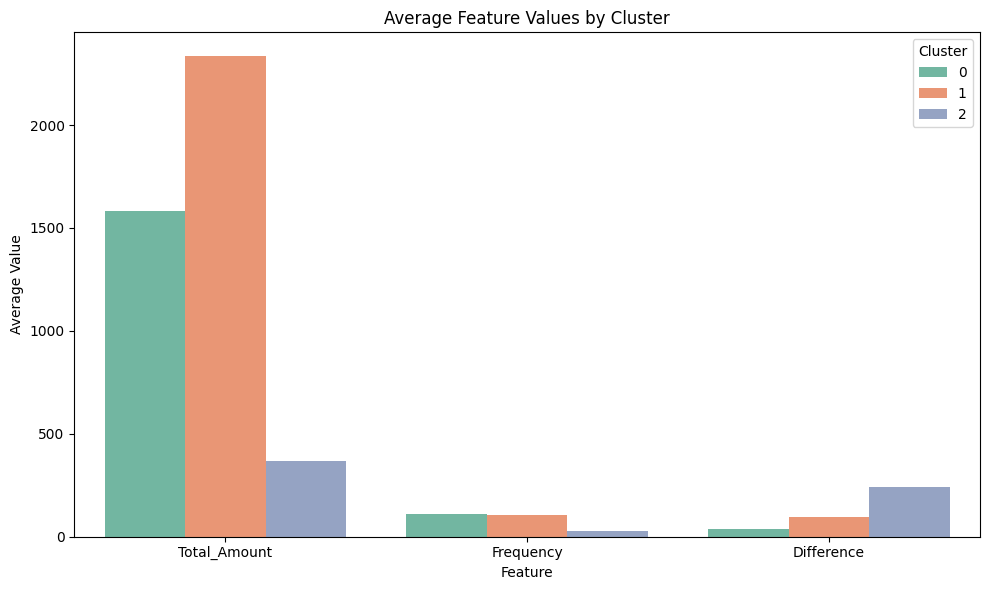

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'kmeans_label' with the label column you're analyzing (e.g., 'aglo_label')
label_col = 'kmeans_label'  # or 'aglo_label'

# Optional: select only relevant numeric features
features_to_plot = ['Total_Amount', 'Frequency', 'Difference']  # modify if needed

# Group by cluster and calculate mean for each feature
cluster_means = df_final.groupby(label_col)[features_to_plot].mean().reset_index()

# Melt for seaborn barplot
melted = cluster_means.melt(id_vars=label_col, var_name='Feature', value_name='Mean')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean', hue=label_col, data=melted, palette='Set2')
plt.title('Average Feature Values by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


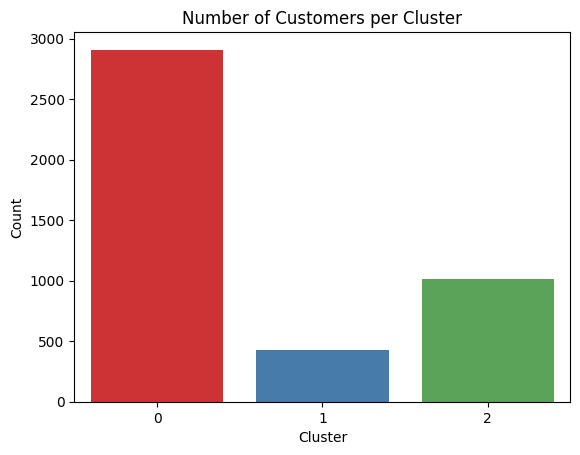

In [ ]:
sns.countplot(x=label_col, data=df_final, palette='Set1')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

1. Cluster 1: High-Value, Less Frequent Big Spenders (High-Profile)
Description:
This cluster comprises customers who demonstrate the highest average overall spend. Although they do not shop as frequently as others, their transactions are substantial when they occur. Their purchasing pattern reflects significant revenue potential, but less frequent engagement compared to the most regular customers.

Recommendations:

- Develop exclusive, high-value offers or VIP shopping experiences to increase their frequency of visits.

- Offer early access to premium products or personalized discounts on big-ticket items.

- Craft special loyalty tiers or incentive programs that reward large purchases and encourage these customers to shop more often.

2. Cluster 0: Regular Engagers with Moderate Spend (Medium-Profile)
Description:
Customers in this group exhibit moderate total spend but maintain a high purchase frequency and the lowest variability in shopping behavior. These are the “steady regulars”—reliably visiting and making purchases, sustaining a consistent revenue stream through habitual engagement.

Recommendations:

- Implement ongoing loyalty programs that offer rewards for continued, frequent shopping.

- Use tailored communications to reinforce existing habits and introduce related products.

- Solicit feedback about their experience to foster brand connection and advocacy.

3. Cluster 2: Infrequent, Low-Value Customers (Low-Profile)
Description:
This cluster consists of customers who have the lowest total spend and shop the least often. They display the highest variability in recency—meaning there are long gaps between their interactions with the business.

Recommendations:

-Deploy re-engagement marketing efforts such as time-limited discounts or personalized reminders.

- Address potential barriers to frequent shopping by simplifying the purchase process and highlighting introductory offers.

- Utilize targeted messages to reintroduce the brand, increase relevancy, or suggest complementary products.

# **Conclusion**


After removing the customer identifier column from the data, our classification model delivered outstanding performance, achieving an overall accuracy of 98.5% with equally high precision, recall, and F1 scores across all segments. The consistency of the results—both on the hold-out test set and through rigorous cross-validation—underscores that clustering driven by meaningful, interpretable features leads to successful and actionable segmentation. This validates the effectiveness of our feature engineering and preprocessing decisions, ensuring that the resulting customer segments provide actionable insights for business strategy and growth.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***